# Modeling

We will aim to produce a dataset that is ideal for Linear Regression. The most important things to consider will be the main 3 assumptions: linearity and a constant slope, normality of the resulting residuals, and homoscedasticity where the resulting residuals do not have any outliers.

In order to monitor our progress and to ensure we are constantly improving, we will create a model after each step and measure the outcomes so we can inspect for the 3 assumptions and make sure we are improving in all areas.

In [1]:
# graphing
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="whitegrid")
sns.set_context('notebook')
%matplotlib inline

In [2]:
# import our module for tracking model performance
import model as sc
import numpy as np

In [3]:
model = sc.Scores()

In [4]:
import pandas as pd
df = pd.read_csv('../data/processed/housing_data.csv', index_col=0)

In [5]:
df.head()

,id,school_kms,school_mins,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,view,...,zipcode,lat,long,sqft_living15,sqft_lot15,median_household_income,median_home_value,walk_score,transit_score,bike_score
8,1200019,18.352,26.150,647500.0,4,1.75,2060,26036,1.0,0.0,...,98166,47.4444,-122.351,2590,21891,63320,386900,10.0,-1.0,18.0
9,1200021,18.372,25.700,400000.0,3,1.00,1460,43000,1.0,0.0,...,98166,47.4434,-122.347,2250,20023,63320,386900,9.0,-1.0,24.0
10,2800031,18.673,17.917,235000.0,3,1.00,1430,7599,1.5,0.0,...,98168,47.4783,-122.265,1290,10320,49233,240000,34.0,-1.0,25.0
11,3600057,9.392,10.567,402500.0,4,2.00,1650,3504,1.0,0.0,...,98144,47.5803,-122.294,1480,3504,55950,391000,80.0,-1.0,73.0
12,3600072,9.370,10.483,680000.0,4,2.75,2220,5310,1.0,0.0,...,98144,47.5801,-122.294,1540,4200,55950,391000,80.0,-1.0,73.0


## Linearity:
First, linear regression needs the relationship between the independent and dependent variables to be linear.  It is also important to check for outliers since linear regression is sensitive to outlier effects.  

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13998 entries, 8 to 22670
Data columns (total 25 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       13998 non-null  int64  
 1   school_kms               13998 non-null  float64
 2   school_mins              13998 non-null  float64
 3   price                    13998 non-null  float64
 4   bedrooms                 13998 non-null  int64  
 5   bathrooms                13998 non-null  float64
 6   sqft_living              13998 non-null  int64  
 7   sqft_lot                 13998 non-null  int64  
 8   floors                   13998 non-null  float64
 9   view                     13998 non-null  float64
 10  condition                13998 non-null  int64  
 11  grade                    13998 non-null  int64  
 12  sqft_above               13998 non-null  int64  
 13  sqft_basement            13998 non-null  int64  
 14  yr_built              

In [7]:
# dropping any columns that do not show a linear relationship
to_check = df.drop(
    ['bathrooms', 'bedrooms', 'floors', 'id', 'lat', 'long', 
     'median_household_income', 'price', 'school_mins', 'sqft_above', 
     'sqft_basement', 'sqft_lot', 'sqft_lot15', 'transit_score', 
     'view', 'walk_score', 'yr_built', 'zipcode'], axis=1).columns

In [8]:
df[to_check].dtypes

school_kms           float64
sqft_living            int64
condition              int64
grade                  int64
sqft_living15          int64
median_home_value      int64
bike_score           float64
dtype: object

### Scatterplot with Regression line

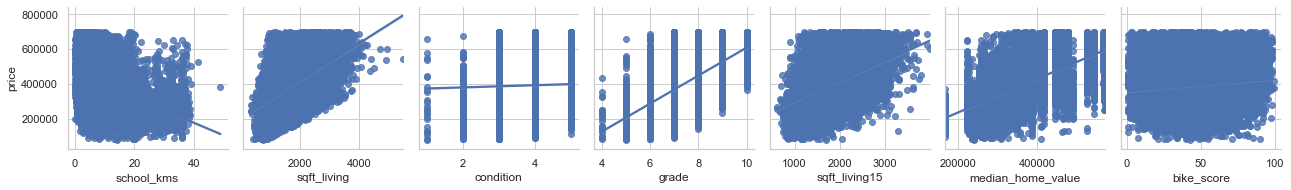

In [9]:
sns.pairplot(x_vars=to_check, y_vars='price', data=df, kind='reg');

In [10]:
(df['sqft_living15'] < 500).sum()

0

## Multivariate Normality:
Secondly, the linear regression analysis requires all variables to be multivariate normal.  This assumption can best be checked with a histogram or a Q-Q-Plot.  Normality can be checked with a goodness of fit test, e.g., the Kolmogorov-Smirnov test.  When the data is not normally distributed a non-linear transformation (e.g., log-transformation) might fix this issue.

In [11]:
for col in to_check:
    print(col)
    model.evaluate_model(f'checking {col} for normality', df[['price', col]])

school_kms
sqft_living
condition
grade
sqft_living15
median_home_value
bike_score


In [12]:
model.scores.sort_values('5-Fold Cross Validation', ascending=False)

,Description,"RMSE (training, test)","R-squared (training, test)","Adjusted R-squared (training, test)",5-Fold Cross Validation
5,checking median_home_value for normality,"(104389.402, 104085.573)","(0.404, 0.371)","(0.404, 0.371)",0.392
3,checking grade for normality,"(115066.766, 115954.298)","(0.261, 0.266)","(0.261, 0.266)",0.259
1,checking sqft_living for normality,"(116624.786, 117737.211)","(0.245, 0.232)","(0.245, 0.232)",0.238
0,checking school_kms for normality,"(116765.878, 117493.385)","(0.242, 0.237)","(0.242, 0.237)",0.236
4,checking sqft_living15 for normality,"(121325.462, 120419.411)","(0.188, 0.180)","(0.188, 0.180)",0.182
6,checking bike_score for normality,"(133117.895, 134250.424)","(0.012, 0.013)","(0.012, 0.013)",0.007
2,checking condition for normality,"(134121.731, 134417.290)","(0.001, 0.000)","(0.001, 0.000)",-0.006


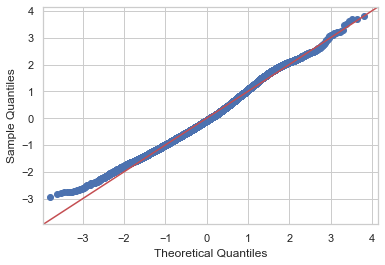

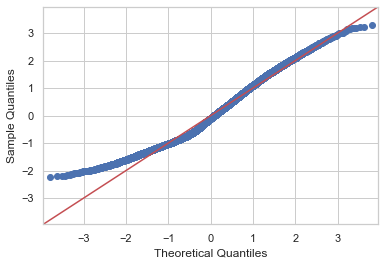

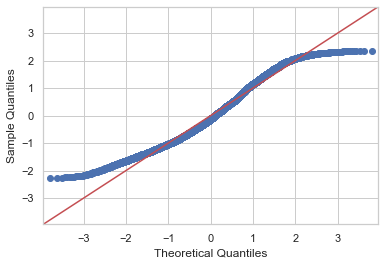

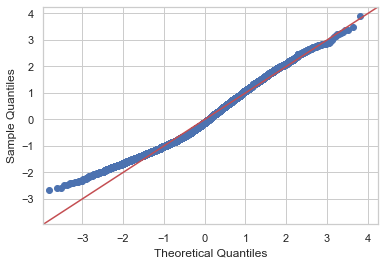

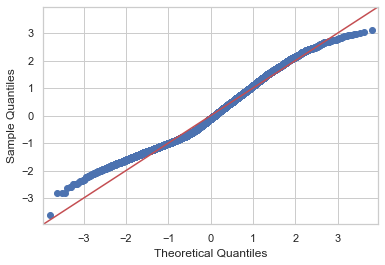

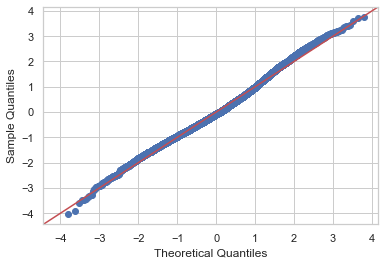

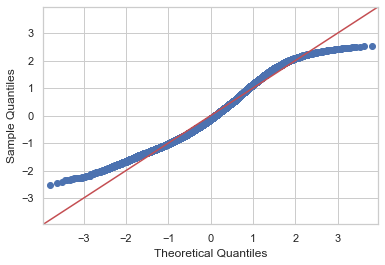

In [13]:
for i in range(len(model.sm_results)):
    model.plot_qq(i);

Definately not normally distributed residuals. Maybe a power transfrom will make it more uniform.
Time to plot some histograms to look for skewdnes.

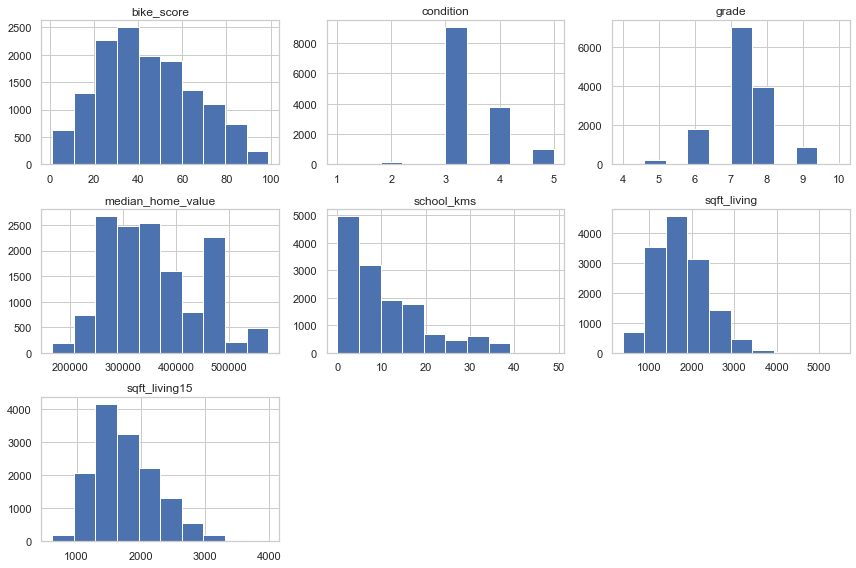

In [14]:
df[to_check].hist(figsize=(12, 8))
plt.tight_layout();

In [15]:
from sklearn.preprocessing import QuantileTransformer
qt = QuantileTransformer(output_distribution='normal')
to_transform= ['bike_score', 'bedrooms', 'bathrooms', 'median_household_income', 'median_home_value', 'school_kms', 'grade',
               'school_mins', 'sqft_above', 'sqft_living', 'sqft_living15', 'walk_score', 'condition']
df[to_transform] = qt.fit_transform(df[to_transform])

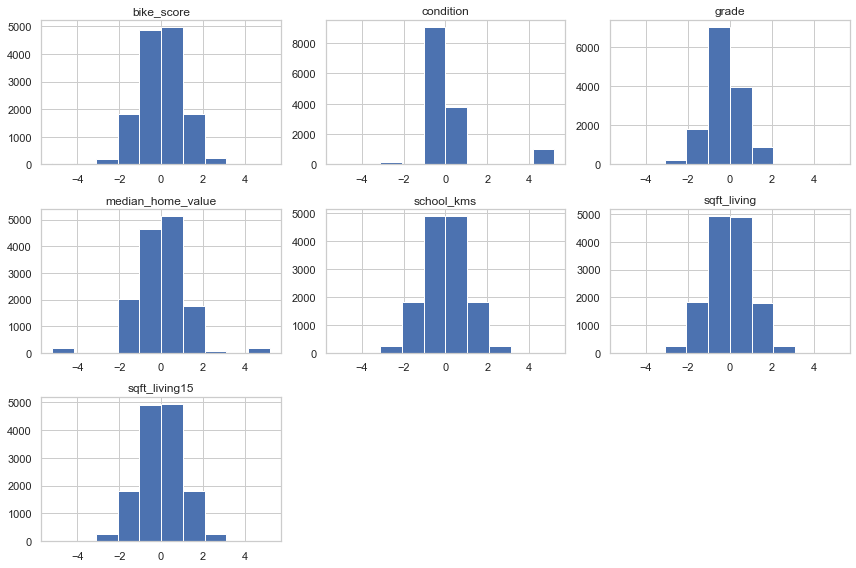

In [16]:
df[to_check].hist(figsize=(12, 8))
plt.tight_layout()

In [17]:
#Finding a cutoff point
for col in ['bathrooms', 'bike_score', 'walk_score', 'school_kms', 'condition', 'sqft_living', 'grade', 'sqft_above', 'sqft_living15', 'median_household_income', 'median_home_value']:
    df = df[df[col].between(df[col].quantile(.05), df[col].quantile(.95))]

In [18]:
df.sample(3)

,id,school_kms,school_mins,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,view,...,zipcode,lat,long,sqft_living15,sqft_lot15,median_household_income,median_home_value,walk_score,transit_score,bike_score
3024,1254200015,-1.353871,-1.215372,625000.0,-0.16764,0.830234,0.860725,5500,1.5,0.0,...,98117,47.6810,-122.388,0.189310,5355,0.535083,0.901416,1.010382,-1.0,1.298271
13721,5365200040,0.804184,0.443592,235000.0,-0.16764,-1.174387,-0.731515,7153,1.0,0.0,...,98055,47.4815,-122.226,-0.075345,7153,-0.318969,-1.046576,0.692715,-1.0,-0.345485
21920,9441300030,-0.162641,0.031369,615000.0,-0.16764,-0.262686,1.355761,8280,1.0,0.0,...,98177,47.7235,-122.359,-0.342823,8160,1.077446,1.435477,0.372246,-1.0,0.245840


In [19]:
for col in to_check:
    print(col)
    model.evaluate_model(f'checking {col} for normality, after transform', df[['price', col]].dropna())

school_kms
sqft_living
condition
grade
sqft_living15
median_home_value
bike_score


In [20]:
model.scores[len(to_check):]

,Description,"RMSE (training, test)","R-squared (training, test)","Adjusted R-squared (training, test)",5-Fold Cross Validation
7,"checking school_kms for normality, after trans...","(94518.951, 95591.887)","(0.292, 0.303)","(0.292, 0.303)",0.290
8,"checking sqft_living for normality, after tran...","(104189.916, 106020.866)","(0.143, 0.134)","(0.143, 0.134)",0.136
9,"checking condition for normality, after transform","(112393.870, 112153.366)","(0.012, 0.004)","(0.012, 0.004)",0.003
10,"checking grade for normality, after transform","(104112.365, 106849.105)","(0.141, 0.133)","(0.141, 0.133)",0.134
11,"checking sqft_living15 for normality, after tr...","(107380.265, 109080.609)","(0.092, 0.078)","(0.092, 0.078)",0.083
12,"checking median_home_value for normality, afte...","(84168.256, 85214.594)","(0.441, 0.442)","(0.441, 0.442)",0.435
13,"checking bike_score for normality, after trans...","(108507.057, 110100.327)","(0.069, 0.069)","(0.069, 0.069)",0.063


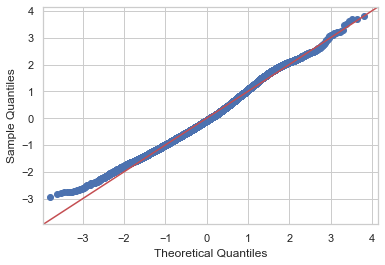

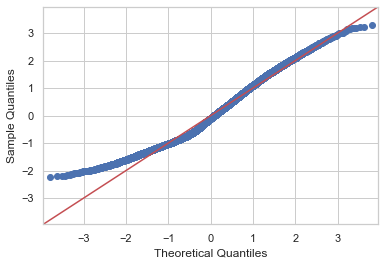

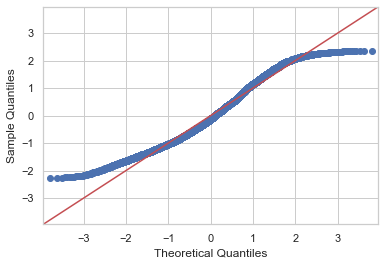

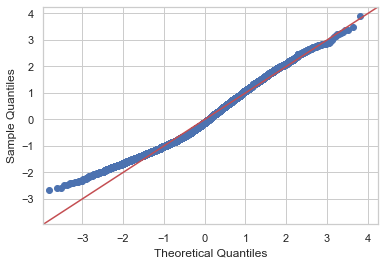

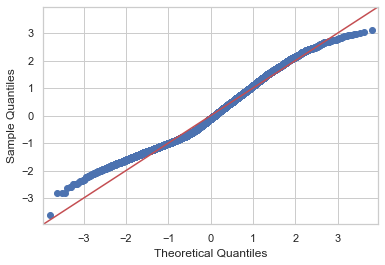

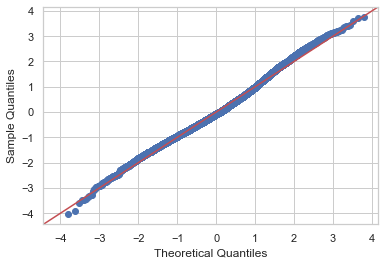

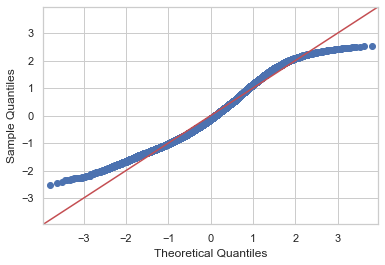

In [21]:
for i in range(len(model.sm_results[len(to_check):])):
    model.plot_qq(i);

## No multicollinearity 
Linear regression assumes that there is little or no multicollinearity in the data.  Multicollinearity occurs when the independent variables are too highly correlated with each other.

### Correlation matrix 

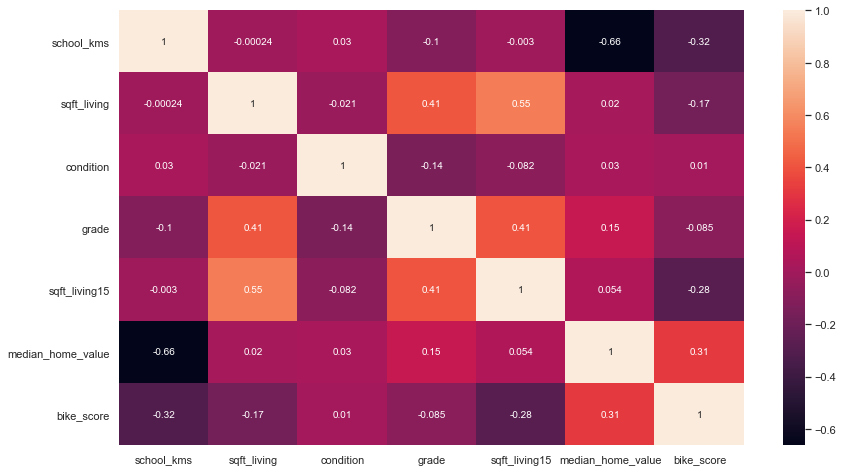

In [22]:
fig = plt.figure(figsize=(14, 8))
sns.heatmap(df[to_check].corr(), annot=True);

### Variance Inflation Factor (VIF) 

In [23]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
X = df[to_check]
vif = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
list(zip(to_check, vif))

[('school_kms', 1.834440769772891),
 ('sqft_living', 1.5438233807735489),
 ('condition', 1.039697085408021),
 ('grade', 1.3523790607340496),
 ('sqft_living15', 1.6339362052062985),
 ('median_home_value', 1.8856767486437152),
 ('bike_score', 1.2591153335685883)]

## Homoscedasticity:
The residuals are equal across the regression line

In [24]:
for i in range(len(model.sm_results)):
    print(model.sm_results[i].summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.241
Model:                            OLS   Adj. R-squared:                  0.241
Method:                 Least Squares   F-statistic:                     4449.
Date:                Wed, 06 May 2020   Prob (F-statistic):               0.00
Time:                        12:16:26   Log-Likelihood:            -1.8321e+05
No. Observations:               13998   AIC:                         3.664e+05
Df Residuals:                   13996   BIC:                         3.664e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       4.647e+05   1516.634    306.402      0.0

In [25]:
columns_to_check = to_check.to_list()
columns_to_check.append('price')
model.evaluate_model(f'all', df[columns_to_check])

,Description,"RMSE (training, test)","R-squared (training, test)","Adjusted R-squared (training, test)",5-Fold Cross Validation
0,checking school_kms for normality,"(116765.878, 117493.385)","(0.242, 0.237)","(0.242, 0.237)",0.236
1,checking sqft_living for normality,"(116624.786, 117737.211)","(0.245, 0.232)","(0.245, 0.232)",0.238
2,checking condition for normality,"(134121.731, 134417.290)","(0.001, 0.000)","(0.001, 0.000)",-0.006
3,checking grade for normality,"(115066.766, 115954.298)","(0.261, 0.266)","(0.261, 0.266)",0.259
4,checking sqft_living15 for normality,"(121325.462, 120419.411)","(0.188, 0.180)","(0.188, 0.180)",0.182
5,checking median_home_value for normality,"(104389.402, 104085.573)","(0.404, 0.371)","(0.404, 0.371)",0.392
6,checking bike_score for normality,"(133117.895, 134250.424)","(0.012, 0.013)","(0.012, 0.013)",0.007
7,"checking school_kms for normality, after trans...","(94518.951, 95591.887)","(0.292, 0.303)","(0.292, 0.303)",0.290
8,"checking sqft_living for normality, after tran...","(104189.916, 106020.866)","(0.143, 0.134)","(0.143, 0.134)",0.136
9,"checking condition for normality, after transform","(112393.870, 112153.366)","(0.012, 0.004)","(0.012, 0.004)",0.003


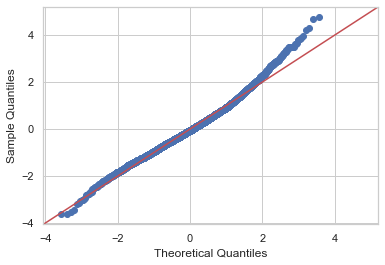

In [26]:
model.plot_qq();

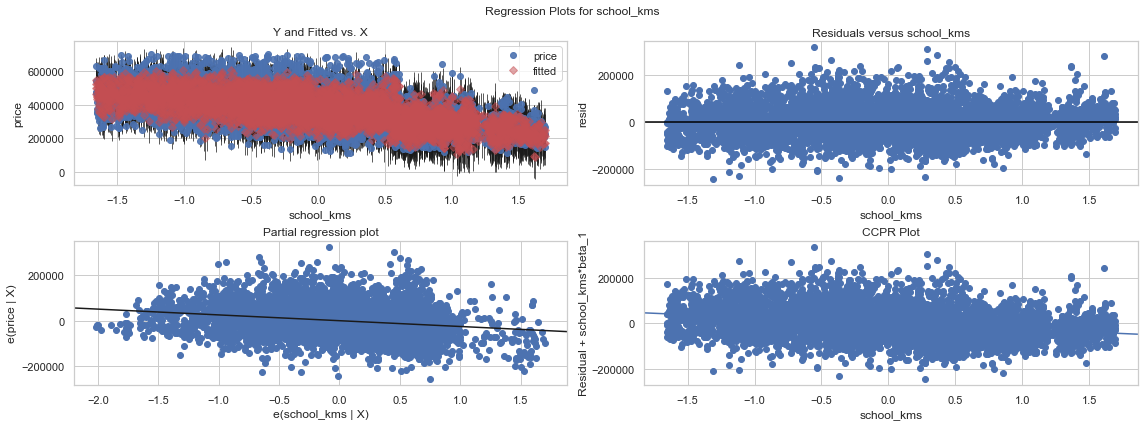

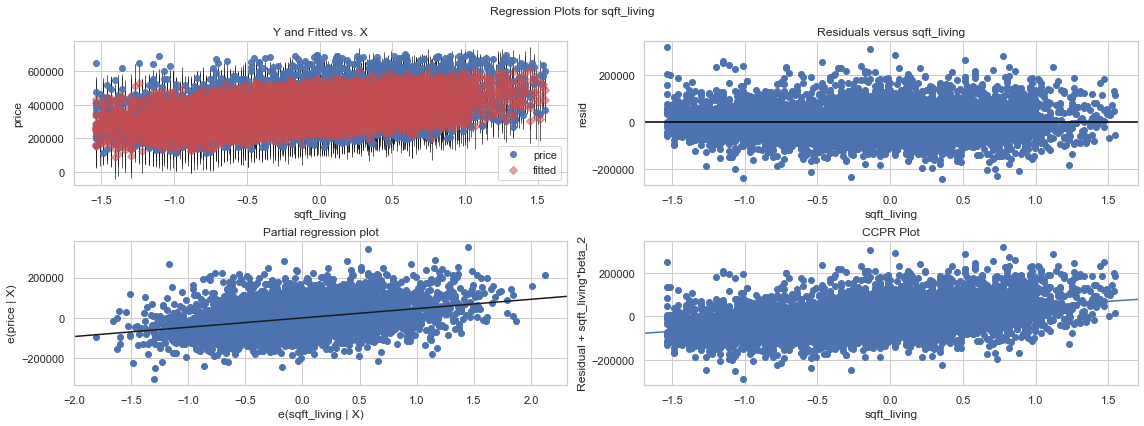

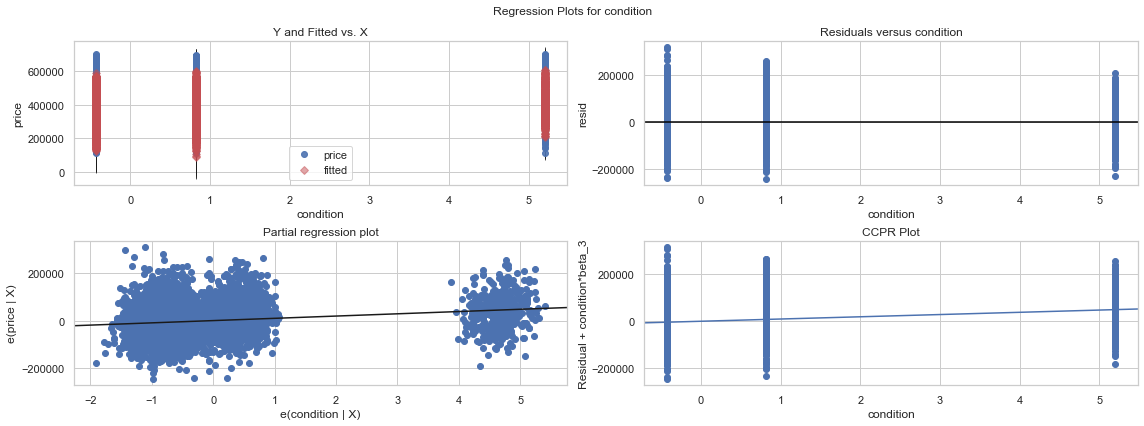

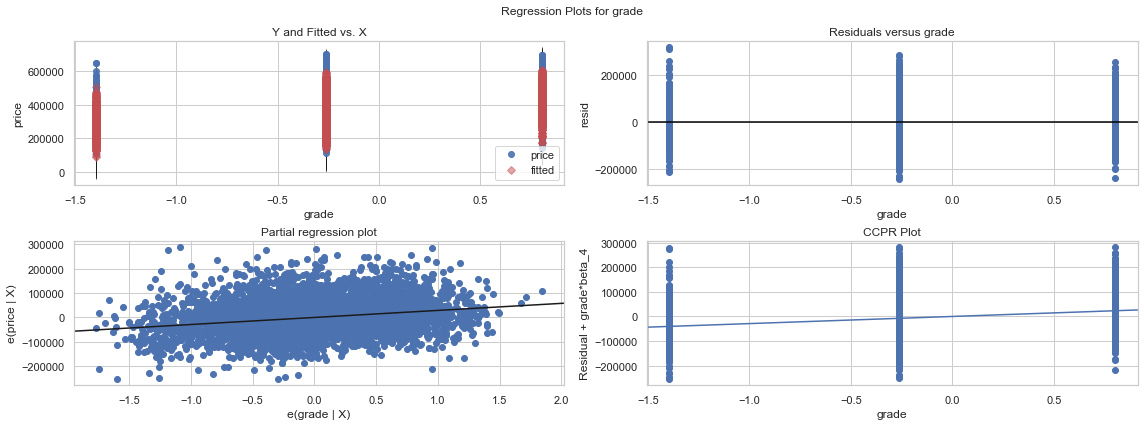

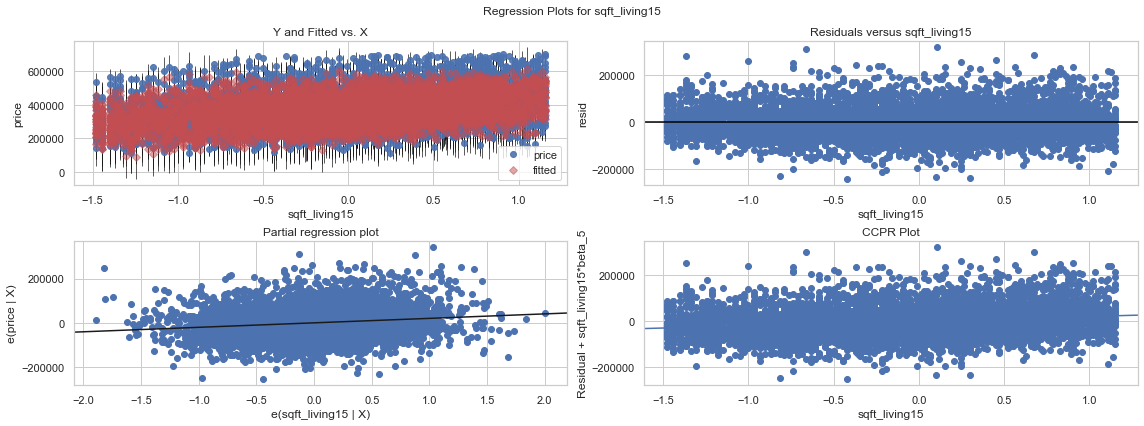

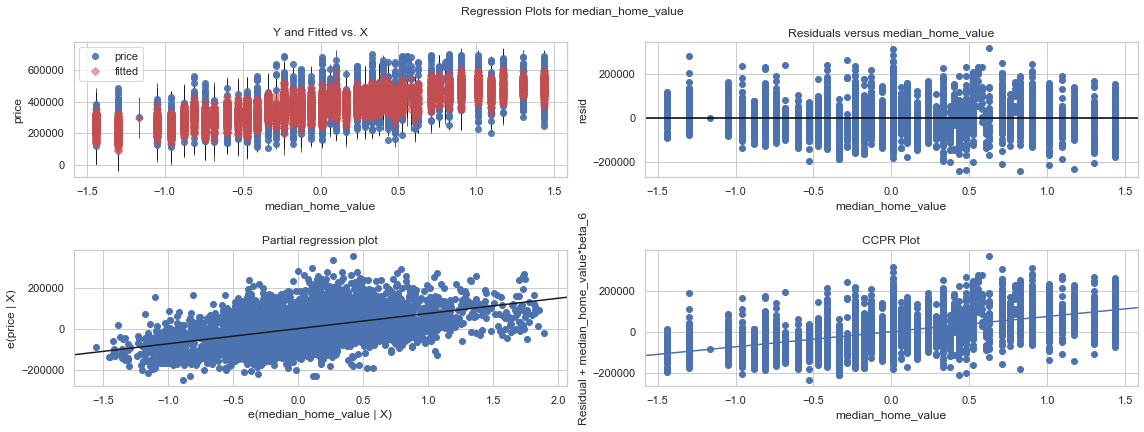

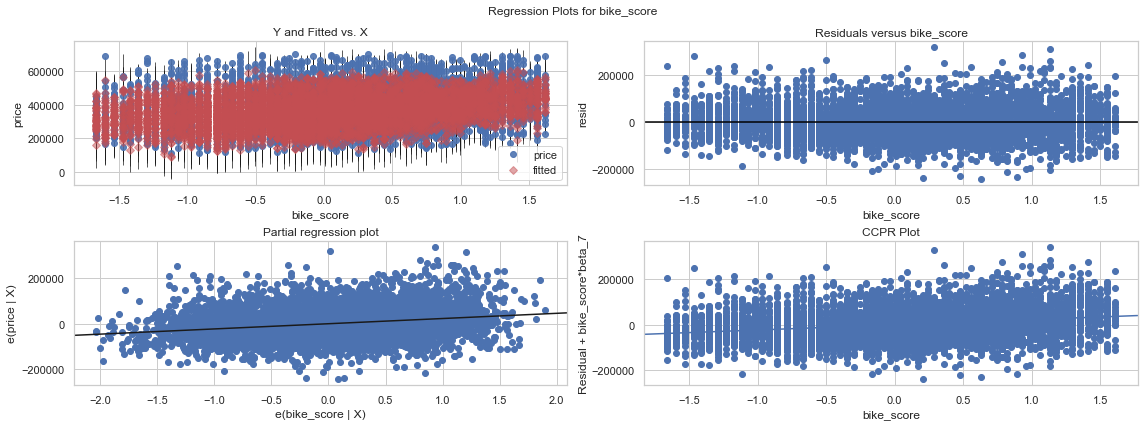

In [27]:
for col in to_check:
    fig = plt.figure(figsize=(16, 6))
    model.plot_feature(col, fig=fig)

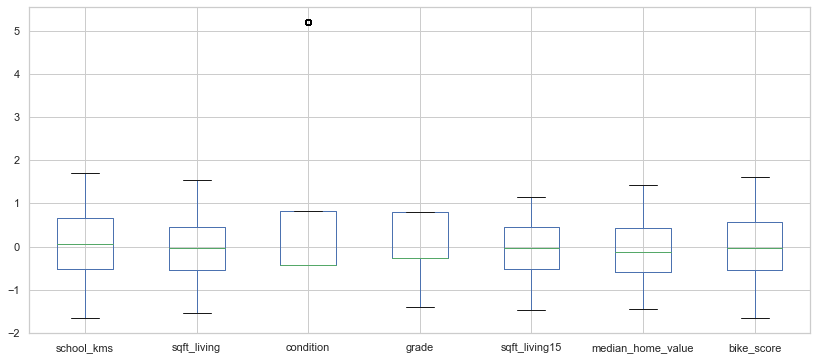

In [28]:
df[to_check].plot.box(figsize=(14, 6))

In [29]:
model.sm_results[-1].summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.649
Model:                            OLS   Adj. R-squared:                  0.649
Method:                 Least Squares   F-statistic:                     1515.
Date:                Wed, 06 May 2020   Prob (F-statistic):               0.00
Time:                        12:16:41   Log-Likelihood:                -71907.
No. Observations:                5739   AIC:                         1.438e+05
Df Residuals:                    5731   BIC:                         1.439e+05
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const              3.763e+05    924.485    407.051      0.000    3.75e+05    3.78e+05
school_kms        -2.542e+04   1508.802    -16.849      0.000   -2.84e+04   -2.25e+04
sqft_living         4.61e+04   1664.354     27.700      0.000    4.28e+04    4.94e+04
condition          9545.5528    585.065     16.315      0.000    8398.604    1.07e+04
grade              2.897e+04   1647.926     17.580      0.000    2.57e+04    3.22e+04
sqft_living15      2.018e+04   1744.880     11.567      0.000    1.68e+04    2.36e+04
median_home_value  7.384e+04   1732.619     42.616      0.000    7.04e+04    7.72e+04
bike_score         2.281e+04   1289.888     17.683      0.000    2.03e+04    2.53e+04
==============================================================================
Omnibus:                      246.979   Durbin-Watson:                   1.430
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              342.380
Skew:                           0.423   Prob(JB):                     4.50e-75
Kurtosis:                       3.846   Cond. No.                         3.94
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### Zipcodes

In [30]:
columns_to_check = to_check.to_list()
columns_to_check += ['price', 'zipcode']
model.evaluate_model(f'with zipcodes', df[columns_to_check], encode_dummies=['zipcode'])

,Description,"RMSE (training, test)","R-squared (training, test)","Adjusted R-squared (training, test)",5-Fold Cross Validation
0,checking school_kms for normality,"(116765.878, 117493.385)","(0.242, 0.237)","(0.242, 0.237)",0.236
1,checking sqft_living for normality,"(116624.786, 117737.211)","(0.245, 0.232)","(0.245, 0.232)",0.238
2,checking condition for normality,"(134121.731, 134417.290)","(0.001, 0.000)","(0.001, 0.000)",-0.006
3,checking grade for normality,"(115066.766, 115954.298)","(0.261, 0.266)","(0.261, 0.266)",0.259
4,checking sqft_living15 for normality,"(121325.462, 120419.411)","(0.188, 0.180)","(0.188, 0.180)",0.182
5,checking median_home_value for normality,"(104389.402, 104085.573)","(0.404, 0.371)","(0.404, 0.371)",0.392
6,checking bike_score for normality,"(133117.895, 134250.424)","(0.012, 0.013)","(0.012, 0.013)",0.007
7,"checking school_kms for normality, after trans...","(94518.951, 95591.887)","(0.292, 0.303)","(0.292, 0.303)",0.290
8,"checking sqft_living for normality, after tran...","(104189.916, 106020.866)","(0.143, 0.134)","(0.143, 0.134)",0.136
9,"checking condition for normality, after transform","(112393.870, 112153.366)","(0.012, 0.004)","(0.012, 0.004)",0.003


In [31]:
model.sm_results[-1].summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.734
Model:                            OLS   Adj. R-squared:                  0.732
Method:                 Least Squares   F-statistic:                     314.6
Date:                Wed, 06 May 2020   Prob (F-statistic):               0.00
Time:                        12:16:42   Log-Likelihood:                -71109.
No. Observations:                5739   AIC:                         1.423e+05
Df Residuals:                    5688   BIC:                         1.427e+05
Df Model:                          50                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const              3.747e+05   2064.874    181.451      0.000    3.71e+05    3.79e+05
school_kms        -2.181e+04   2726.148     -8.000      0.000   -2.72e+04   -1.65e+04
sqft_living          4.8e+04   1467.947     32.699      0.000    4.51e+04    5.09e+04
condition          8842.9183    523.684     16.886      0.000    7816.297    9869.539
grade              2.565e+04   1498.312     17.122      0.000    2.27e+04    2.86e+04
sqft_living15       2.24e+04   1574.243     14.227      0.000    1.93e+04    2.55e+04
median_home_value  9.063e+04   4419.483     20.506      0.000     8.2e+04    9.93e+04
bike_score        -2132.8102   1463.249     -1.458      0.145   -5001.335     735.715
zipcode_98007      4.323e+04   1.04e+04      4.174      0.000    2.29e+04    6.35e+04
zipcode_98008      2.769e+04   4977.245      5.564      0.000    1.79e+04    3.75e+04
zipcode_98010     -3.592e+04   1.07e+04     -3.346      0.001    -5.7e+04   -1.49e+04
zipcode_98011      1.332e+04   7155.430      1.861      0.063    -708.709    2.73e+04
zipcode_98014     -6.044e+04   1.27e+04     -4.766      0.000   -8.53e+04   -3.56e+04
zipcode_98019     -8.331e+04   7634.580    -10.912      0.000   -9.83e+04   -6.83e+04
zipcode_98022     -3.049e+04   6194.888     -4.923      0.000   -4.26e+04   -1.84e+04
zipcode_98023      1.842e+04   5.87e+04      0.314      0.754   -9.66e+04    1.33e+05
zipcode_98028     -4.361e+04   5348.873     -8.152      0.000   -5.41e+04   -3.31e+04
zipcode_98029      6700.2141   5616.341      1.193      0.233   -4309.955    1.77e+04
zipcode_98030       3.73e+04   8009.243      4.657      0.000    2.16e+04     5.3e+04
zipcode_98031     -3798.6568   5883.893     -0.646      0.519   -1.53e+04    7736.016
zipcode_98034      1.478e+04   4253.872      3.475      0.001    6441.388    2.31e+04
zipcode_98038      -6.32e+04   5627.435    -11.231      0.000   -7.42e+04   -5.22e+04
zipcode_98042     -4.581e+04   5330.363     -8.595      0.000   -5.63e+04   -3.54e+04
zipcode_98045     -2.393e+04   8170.557     -2.929      0.003   -3.99e+04   -7912.746
zipcode_98052     -3051.0242   4883.422     -0.625      0.532   -1.26e+04    6522.344
zipcode_98055      2.481e+04   6792.579      3.653      0.000    1.15e+04    3.81e+04
zipcode_98056     -2.242e+04   4954.884     -4.525      0.000   -3.21e+04   -1.27e+04
zipcode_98058     -1.662e+04   4835.334     -3.436      0.001   -2.61e+04   -7137.195
zipcode_98059     -4.103e+04   5148.411     -7.970      0.000   -5.11e+04   -3.09e+04
zipcode_98070     -1.545e+04    1.1e+04     -1.403      0.161    -3.7e+04    6141.545
zipcode_98072     -5.422e+04   6563.539     -8.261      0.000   -6.71e+04   -4.14e+04
zipcode_98092     -3.833e+04   6351.731     -6.035      0.000   -5.08e+04   -2.59e+04
zipcode_98102      1.909e+05   1.81e+04     10.563      0.000    1.56e+05

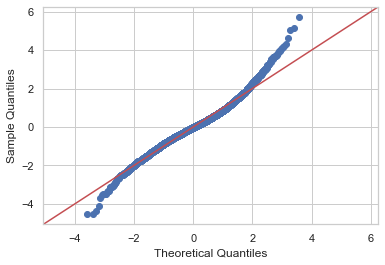

In [32]:
model.plot_qq();

### Polynomial

In [33]:
from sklearn.preprocessing import PolynomialFeatures

y = df['price']
X = df[to_check]

poly = PolynomialFeatures(3)
X_fin = poly.fit_transform(X)

In [34]:
poly_df = pd.DataFrame(X_fin, columns=poly.get_feature_names())

In [35]:
y = y.reset_index().drop('index', axis=1)

In [36]:
poly_df['price'] = y

In [37]:
model.evaluate_model('polynomial', poly_df)

,Description,"RMSE (training, test)","R-squared (training, test)","Adjusted R-squared (training, test)",5-Fold Cross Validation
0,checking school_kms for normality,"(116765.878, 117493.385)","(0.242, 0.237)","(0.242, 0.237)",0.236
1,checking sqft_living for normality,"(116624.786, 117737.211)","(0.245, 0.232)","(0.245, 0.232)",0.238
2,checking condition for normality,"(134121.731, 134417.290)","(0.001, 0.000)","(0.001, 0.000)",-0.006
3,checking grade for normality,"(115066.766, 115954.298)","(0.261, 0.266)","(0.261, 0.266)",0.259
4,checking sqft_living15 for normality,"(121325.462, 120419.411)","(0.188, 0.180)","(0.188, 0.180)",0.182
5,checking median_home_value for normality,"(104389.402, 104085.573)","(0.404, 0.371)","(0.404, 0.371)",0.392
6,checking bike_score for normality,"(133117.895, 134250.424)","(0.012, 0.013)","(0.012, 0.013)",0.007
7,"checking school_kms for normality, after trans...","(94518.951, 95591.887)","(0.292, 0.303)","(0.292, 0.303)",0.290
8,"checking sqft_living for normality, after tran...","(104189.916, 106020.866)","(0.143, 0.134)","(0.143, 0.134)",0.136
9,"checking condition for normality, after transform","(112393.870, 112153.366)","(0.012, 0.004)","(0.012, 0.004)",0.003


In [38]:
model.sm_results[-1].summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.701
Model:                            OLS   Adj. R-squared:                  0.694
Method:                 Least Squares   F-statistic:                     112.4
Date:                Wed, 06 May 2020   Prob (F-statistic):               0.00
Time:                        12:16:43   Log-Likelihood:                -71452.
No. Observations:                5739   AIC:                         1.431e+05
Df Residuals:                    5621   BIC:                         1.439e+05
Df Model:                         117                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
1           3.216e+05   1886.026    170.515      0.000    3.18e+05    3.25e+05
x0         -3.745e+04   4035.419     -9.281      0.000   -4.54e+04   -2.95e+04
x1          3.911e+04   4261.884      9.176      0.000    3.08e+04    4.75e+04
x2         -1.054e+04   1882.979     -5.599      0.000   -1.42e+04   -6851.378
x3         -1.083e+04   2617.759     -4.138      0.000    -1.6e+04   -5701.082
x4          2.974e+04   4545.630      6.543      0.000    2.08e+04    3.87e+04
x5          9.943e+04   4825.421     20.605      0.000       9e+04    1.09e+05
x6          2.723e+04   3426.223      7.947      0.000    2.05e+04    3.39e+04
x0^2       -1.525e+04   2782.124     -5.483      0.000   -2.07e+04   -9800.475
x0 x1      -1.375e+04   3351.811     -4.103      0.000   -2.03e+04   -7181.500
x0 x2      -3482.5355   2977.768     -1.170      0.242   -9320.111    2355.040
x0 x3      -1241.5524   3187.863     -0.389      0.697   -7490.995    5007.890
x0 x4       1.873e+04   3503.157      5.346      0.000    1.19e+04    2.56e+04
x0 x5       -2.97e+04   4073.739     -7.290      0.000   -3.77e+04   -2.17e+04
x0 x6      -8088.9484   2803.180     -2.886      0.004   -1.36e+04   -2593.633
x1^2        6388.6015   2498.254      2.557      0.011    1491.060    1.13e+04
x1 x2       -388.7897   3038.250     -0.128      0.898   -6344.933    5567.354
x1 x3       1.353e+04   3687.169      3.671      0.000    6305.580    2.08e+04
x1 x4      -9989.5255   3501.121     -2.853      0.004   -1.69e+04   -3125.976
x1 x5      -5699.0837   3622.863     -1.573      0.116   -1.28e+04    1403.126
x1 x6      -5598.0993   2537.468     -2.206      0.027   -1.06e+04    -623.683
x2^2        9.871e+04    685.846    143.919      0.000    9.74e+04       1e+05
x2 x3        862.1525   3241.945      0.266      0.790   -5493.312    7217.617
x2 x4       8357.8300   3343.446      2.500      0.012    1803.385    1.49e+04
x2 x5       1083.2718   3353.952      0.323      0.747   -5491.769    7658.312
x2 x6       3959.9333   2467.693      1.605      0.109    -877.698    8797.565
x3^2        4.053e+04   2255.181     17.973      0.000    3.61e+04     4.5e+04
x3 x4       1859.6031   3680.600      0.505      0.613   -5355.795    9075.001
x3 x5       2858.9432   3295.366      0.868      0.386   -3601.246    9319.132
x3 x6       1872.3848   2580.847      0.725      0.468   -3187.072    6931.842
x4^2        7894.5972   2998.058      2.633      0.008    2017.245    1.38e+04
x4 x5       2.532e+04   3795.467      6.671      0.000    1.79e+04    3.28e+04
x4 x6       4926.5895   2902.840      1.697      0.090    -764.097    1.06e+04
x5^2       -8382.5692   2445.167     -3.428      0.001   -1.32e+04   -3589.097
x5 x6      -1220.2193   3074.696     -0.397      0.691   -7247.810    4807.372
x6^2        8941.2696   1668.707      5.358      0.000    5669.960    1.22e+04
x0

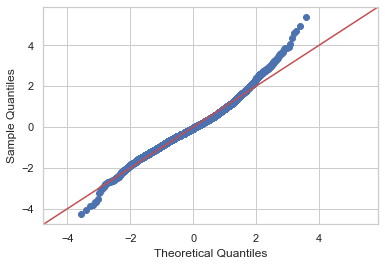

In [39]:
model.plot_qq();

## Conclusion
Now that we have gone through the entire process, let's take some time and make sure we answered each of the questions we set out to answer.

1. **Should home buyers expect to pay more for a house that is rated high for walking and biking?**

There is definitely a positive relationship between the price of a house and it's biking score. Although there are definitely places where you can get a bikeable home at a low cost, those homes tend to be farther away from downtown.

If you would like to live closer to a major downtown area, expect to pay a little bit more for a more bike friendly home.

That being said, though there is a slight positive relationship, it is definitely the smallest influence on price.

2. **Should potential home buyers be aware of any impact that proximity to high quality schools play on the price of homes?**

This question was answered with a definiate yes. School in fact plays one of the most important roles on the price of homes. Whether this is because of the value of education, or whether it is a result of the value placed on education by affluent home buyers, we can say there is absolutely a strong relationship.

The closer the home is to a high rated school, the more you can expect to pay for your home.

3. **What are the most important features to consider when buying a new home? What kind of details will affect the price of a home?**

Below are the 7 different attributes that were used to predict home prices. They were chosen for the model because of the significant impact each one has on the home price. 

Not surprisingly, the median home value per zip code which was gathered during a census, made the biggest impact on the home price. This is not an ideal feature for modeling however, since it is derived from the zipcodes, which lump many areas together which contain a wide range of home prices. It did predict homes more reliably than using zipcodes though, which is why I decided to keep it.

The square feet living feature is not a surprise, as we all assume that the bigger the house, the more expensive, because as the square feet get larger, so does the cost for materials.

Surprisingly, features such as 'bedrooms', 'bathrooms', and 'square feet basement' did very little to influence the price of the homes.

It is obvious though why the features that were influential made it onto the list. 

In [40]:
model.coefs.iloc[-3].dropna().sort_values(ascending=False)

median_home_value    76087.240035
sqft_living          47754.722342
grade                29442.775774
bike_score           22377.589937
sqft_living15        18422.750371
condition             9024.683268
school_kms          -23672.039305
Name: 14, dtype: float64

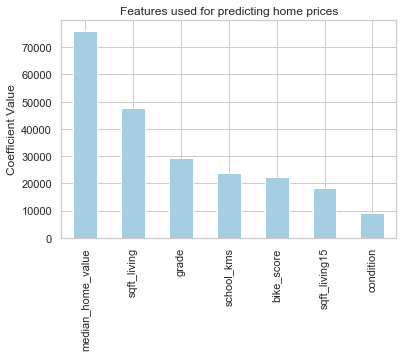

In [41]:
model.coefs.iloc[-3].dropna().apply(np.abs).sort_values(ascending=False).plot.bar(cmap='Paired')
plt.ylabel('Coefficient Value')
plt.title('Features used for predicting home prices');